In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [7]:
! pip install scikit-plot

In [8]:
import scikitplot as skl

In [9]:
sns.set()

In [10]:
data = pd.read_csv('diabetes.csv')

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data['Glucose'].replace(0,data['Glucose'].mean(),inplace=True)
data['BloodPressure'].replace(0,data['BloodPressure'].mean(),inplace=True) 
data['SkinThickness'].replace(0,data['SkinThickness'].mean(),inplace=True)
data['Insulin'].replace(0,data['Insulin'].mean(),inplace=True)
data['BMI'].replace(0,data['BMI'].mean(),inplace=True)

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
q = data['Pregnancies'].quantile(0.98)

In [17]:
data_cleaned = data[data['Pregnancies']<q]

In [18]:
q = data_cleaned['BMI'].quantile(0.99)

In [19]:
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

In [20]:
q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

In [21]:
q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

In [22]:
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

In [23]:
q = data_cleaned['Age'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Age']<q]

In [24]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


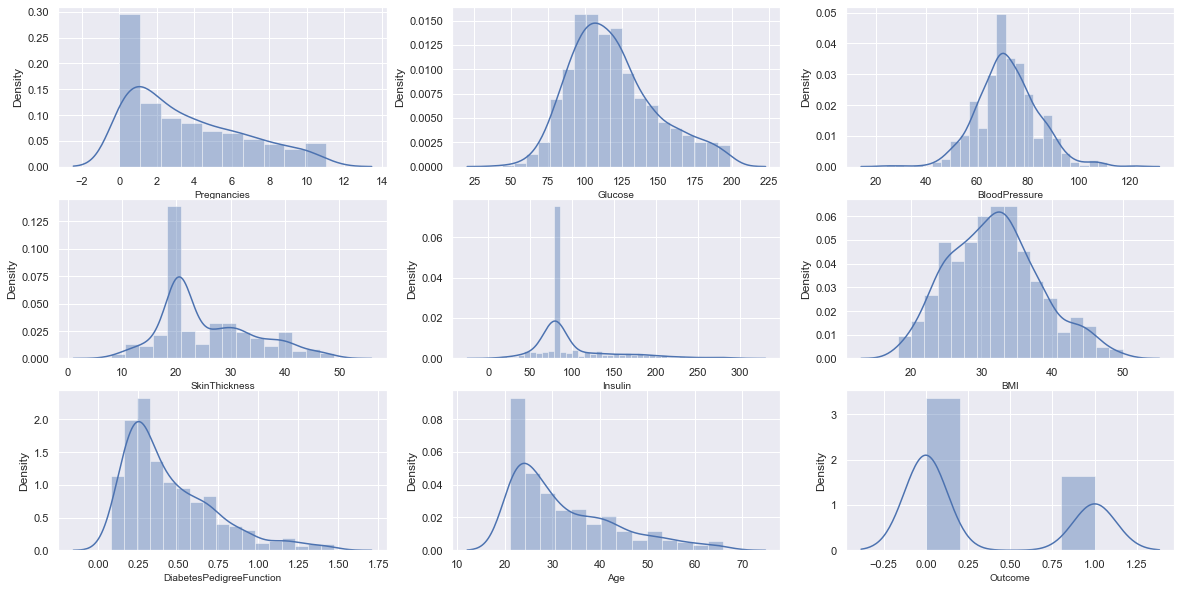

In [25]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,10), facecolor='white')


plotnumber = 1

for col in data_cleaned:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[col])
        plt.xlabel(col, fontsize = 10)
        #plt.ylabel('salary', fontsize= 20)
    plotnumber+=1
plt.show()

In [26]:
x = data.drop('Outcome', axis=1)

In [27]:
y = data.Outcome

In [28]:
scaler = StandardScaler()

In [29]:
x_scaled  = scaler.fit_transform(x)

In [30]:
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [31]:
vif = pd.DataFrame()

In [32]:
vif

""


In [33]:
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [34]:
vif['features'] = x.columns

In [35]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [36]:
vif

,vif,features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb = GaussianNB()

In [40]:
gnb.fit(x_train,y_train)

GaussianNB()

In [41]:
import pickle

In [42]:
y_pred = gnb.predict(x_test)

In [43]:
accuracy_score(y_pred,y_test)

0.7864583333333334

In [44]:
c = confusion_matrix(y_test,y_pred)

In [45]:
c[0][0]

109

In [46]:
c

array([[109,  16],
       [ 25,  42]], dtype=int64)

In [47]:
accura = (109+42)/(109+42+25+16)

In [48]:
accura

0.7864583333333334

In [49]:
precision = 109/(109+16)

In [50]:
precision

0.872

In [51]:
recall = 109/(109+25)

In [52]:
recall

0.8134328358208955

In [53]:
f1_score = 2*(recall*precision)/(recall+precision)

In [54]:
auc = roc_auc_score(y_test,y_pred)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.72      0.63      0.67        67

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



In [57]:
auc

0.7494328358208956

In [58]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)

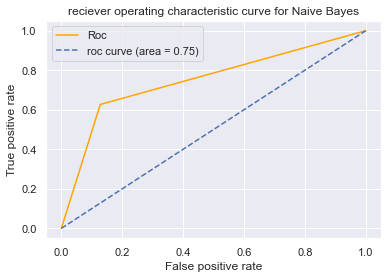

In [59]:
plt.plot(fpr,tpr, label = 'Roc', color = 'orange')
plt.plot([0,1],[0,1],linestyle='dashed', label = 'roc curve (area = %0.2f)' %auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('reciever operating characteristic curve for Naive Bayes')
plt.legend()
plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log_model = LogisticRegression()

In [62]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [63]:
y_pred_log = log_model.predict(x_test)

In [64]:
log_acc = accuracy_score(y_test,y_pred_log)

In [65]:
log_acc

0.7552083333333334

In [66]:
confusion_matrix(y_test,y_pred_log)

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       125
           1       0.70      0.52      0.60        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



In [68]:
fpr_log ,tpr_log,threshold_log = roc_curve(y_test,y_pred_log)

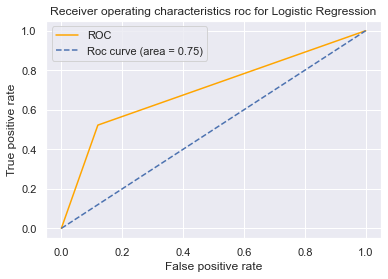

In [69]:
plt.plot(fpr_log,tpr_log, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], linestyle='dashed', label = 'Roc curve (area = %0.2f)' %auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics roc for Logistic Regression')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
auc_naive = roc_auc_score(y_test,y_pred)
auc_naive

0.7494328358208956

In [72]:
auc_logistic = roc_auc_score(y_test,y_pred_log)
auc_logistic

0.7011940298507463